***Titanic Notebook***

In [27]:
# adding the necessary packages for the training

#!source /home/jmm/Mila/myenv_def/bin/activate

!pwd
!ls -lrt
!pip list

/home/jmm/Infinita_Consulting/ABIChallenge_Juan_Manuel_Mayor_Torres/APIs/Titanic
total 15036
drwxrwxrwx 2 root root    4096 oct  8 02:55 data
-rw-r--r-- 1 root root 4697278 oct  8 17:27 models_titanic.pkl
-rw-r--r-- 1 root root 9414551 oct  8 17:27 explainers_titanic.pkl
-rw-rw-r-- 1 jmm  jmm      703 oct  9 10:51 titanic.py
drwxr-xr-x 2 root root    4096 oct  9 10:51 __pycache__
drwxrwxrwx 2 root root    4096 oct  9 13:26 static
drwxrwxrwx 2 root root    4096 oct  9 13:34 templates
-rw-rw-r-- 1 jmm  jmm     4035 oct  9 14:06 app.py
-rwxrwxrwx 1 jmm  jmm  1253702 oct  9 15:01 training_titanic_model.ipynb
Package            Version
------------------ -----------
aiofiles           0.7.0
aiohappyeyeballs   2.4.0
aiohttp            3.10.5
aiosignal          1.3.1
alembic            1.13.2
annotated-types    0.7.0
anyio              4.4.0
argon              0.2.0
asgiref            3.8.1
asrpy              0.0.3
asttokens          2.4.1
attrs              24.2.0
authy              2.2.6
au

In [28]:
!pip install scikit-learn

In [30]:
# importing all the packages necessary for Titanic training
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning models for being tested here
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
# load data and convert them into pandas dataframes
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
combine = [train_df, test_df]

In [32]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
# check the last part of the dataframe
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [35]:
# checking variable distribution
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


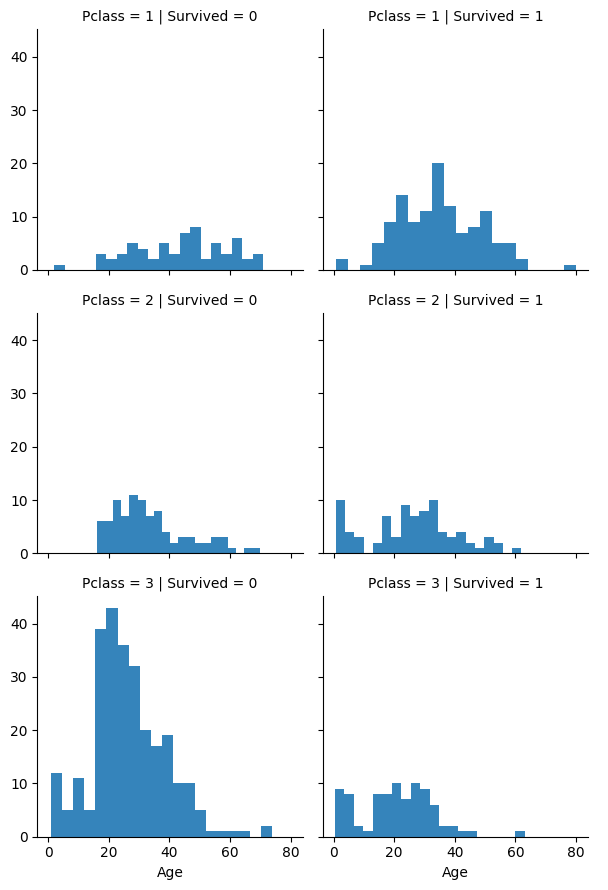

In [36]:
# plotting variables for data exploring 
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.9, bins=20)
grid.add_legend()

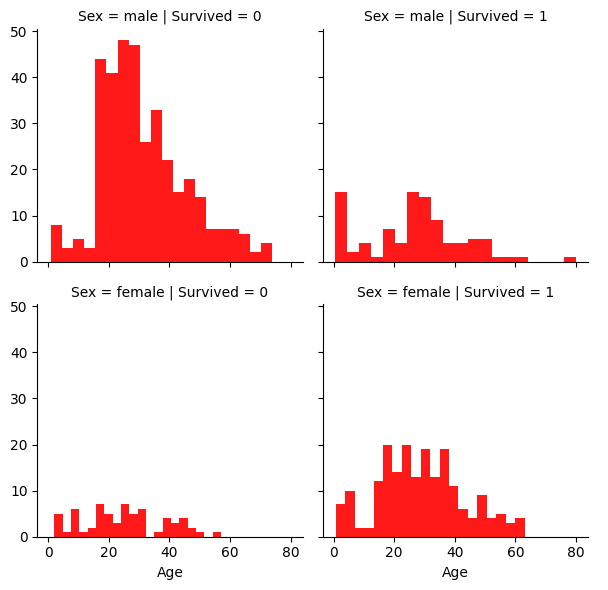

In [37]:
# plotting variables for data exploring 
grid = sns.FacetGrid(train_df, col='Survived', row='Sex')
grid.map(plt.hist, 'Age', alpha=.9, bins=20, color='red')
grid.add_legend()

/home/jmm/Mila/myenv_def/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/jmm/Mila/myenv_def/lib/python3.12/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


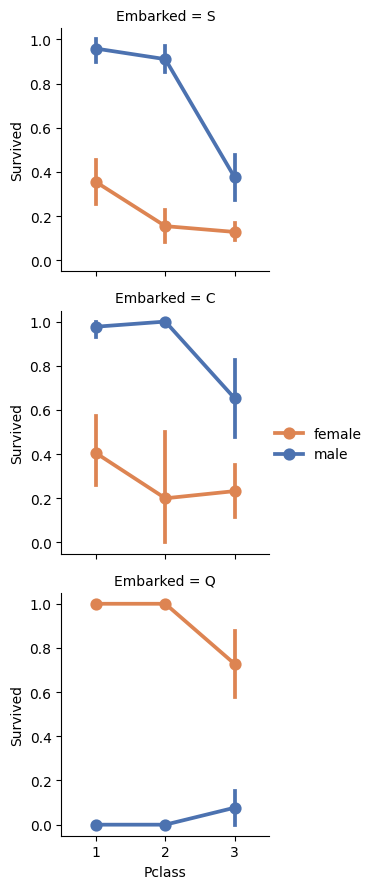

In [38]:
# plot across the categorical variables
grid = sns.FacetGrid(train_df, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/home/jmm/Mila/myenv_def/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/jmm/Mila/myenv_def/lib/python3.12/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


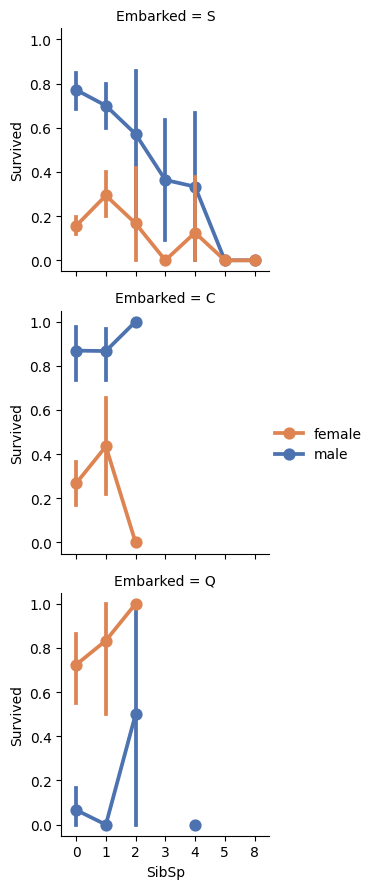

In [39]:
# plot across the categorical variables
grid = sns.FacetGrid(train_df, row='Embarked')
grid.map(sns.pointplot, 'SibSp', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [40]:
# drop Ticket and Cabin features to decrease the variability of the model
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

combine = [train_df, test_df]

In [41]:
# create a new feature called Title grouping some features
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_9398/209607301.py:3: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [42]:
# remove the outliers on the Title new feature and analyze the possible typos
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [44]:
# convert categorical Title to numerical depending on the prefixes of the members
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [45]:
# Drop and convert some features
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

# convert the Sex variable to categorical depending on the categories
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [46]:
guess_ages = np.zeros((2,3))
guess_ages

# create a neew approximate Age variable  (no decimals) based on the Age distribution

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [47]:
# regenerate a new Age variable between the expected Age percentiles

for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [48]:
# create the Familisize new feature

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [49]:
# create the IsAlone feature baseed on the Family size of each Titanic member

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [50]:
# remove the features unnecessary if you consider

#train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
#test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

#combine = [train_df, test_df]

#train_df.head()

In [51]:
# Create the Age*Class feature

for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [52]:
# filled Embarked features

freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# convert Embarked from categorical to numerical 

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,1,0,7.2500,0,1,2,0,3
1,1,1,1,2,1,0,71.2833,1,3,2,0,2
2,1,3,1,1,0,0,7.9250,0,2,1,1,3
3,1,1,1,2,1,0,53.1000,0,3,2,0,2
4,0,3,0,2,0,0,8.0500,0,1,1,1,6


In [53]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,892,3,0,2,0,0,7.8292,2,1,1,1,6
1,893,3,1,2,1,0,7.0000,0,3,2,0,6
2,894,2,0,3,0,0,9.6875,2,1,1,1,6
3,895,3,0,1,0,0,8.6625,0,1,1,1,3
4,896,3,1,1,1,1,12.2875,0,3,3,0,3


In [54]:
# fill the mean values with the median

test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

/tmp/ipykernel_9398/683269670.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,892,3,0,2,0,0,7.8292,2,1,1,1,6
1,893,3,1,2,1,0,7.0000,0,3,2,0,6
2,894,2,0,3,0,0,9.6875,2,1,1,1,6
3,895,3,0,1,0,0,8.6625,0,1,1,1,3
4,896,3,1,1,1,1,12.2875,0,3,3,0,3


In [55]:
# convert Fare to ordinal

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
combine = [train_df, test_df]
    
train_df.head(10)    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,1,0,0,0,1,2,0,3
1,1,1,1,2,1,0,3,1,3,2,0,2
2,1,3,1,1,0,0,1,0,2,1,1,3
3,1,1,1,2,1,0,3,0,3,2,0,2
4,0,3,0,2,0,0,1,0,1,1,1,6
5,0,3,0,1,0,0,1,2,1,1,1,3
6,0,1,0,3,0,0,3,0,1,1,1,3
7,0,3,0,0,3,1,2,0,4,5,0,0
8,1,3,1,1,0,2,1,0,3,3,0,3
9,1,2,1,0,1,0,2,1,3,2,0,0


In [56]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,892,3,0,2,0,0,0,2,1,1,1,6
1,893,3,1,2,1,0,0,0,3,2,0,6
2,894,2,0,3,0,0,1,2,1,1,1,6
3,895,3,0,1,0,0,1,0,1,1,1,3
4,896,3,1,1,1,1,1,0,3,3,0,3
5,897,3,0,0,0,0,1,0,1,1,1,0
6,898,3,1,1,0,0,0,2,2,1,1,3
7,899,2,0,1,1,1,2,0,1,3,0,2
8,900,3,1,1,0,0,0,1,3,1,1,3
9,901,3,0,1,2,0,2,0,1,3,0,3


In [57]:
# definition of Train and Test sets for evaluation go re define the new 
# dfs for the Train and Test sets

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 11), (891,), (418, 11))

In [60]:
X_test.to_csv('test_probe.csv')

In [38]:
!pip list
!pip install xgboost

Package            Version
------------------ -----------
aiohappyeyeballs   2.4.0
aiohttp            3.10.5
aiosignal          1.3.1
alembic            1.13.2
annotated-types    0.7.0
anyio              4.4.0
argon              0.2.0
asrpy              0.0.3
asttokens          2.4.1
attrs              24.2.0
authy              2.2.6
autoflake8         0.4.1
autopep8           2.3.1
babel              2.16.0
bash_kernel        0.9.3
bcrypt             4.2.0
blessed            1.20.0
cachetools         5.5.0
certifi            2024.8.30
cffi               1.17.0
charset-normalizer 3.3.2
click              8.1.7
clip               0.2.0
cloudpickle        3.0.0
cmake              3.30.2
comm               0.2.2
contourpy          1.3.0
cryptography       43.0.0
cycler             0.12.1
Cython             3.0.11
debugpy            1.8.6
decorator          5.1.1
Deprecated         1.2.14
executing          2.1.0
fabric             3.2.2
fastapi            0.115.0
fonttools          4.53.1

Acc= 82.155
Explainer for LogReg..


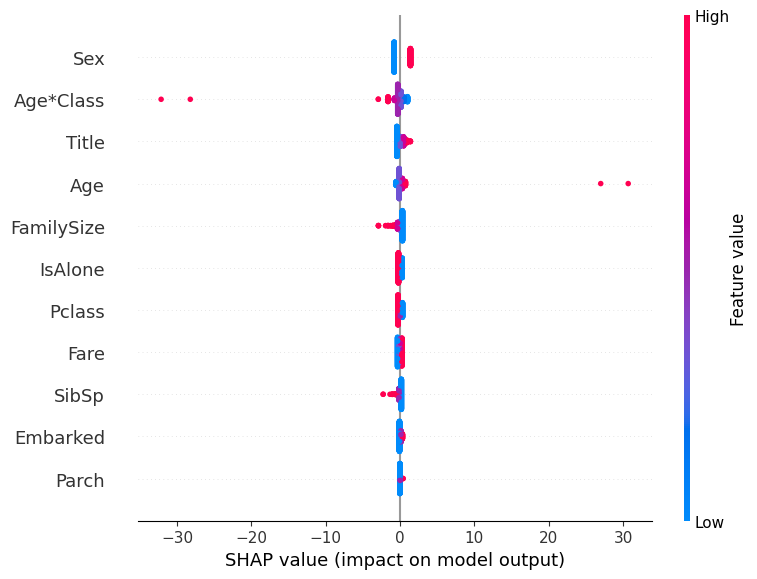

Acc= 81.257


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 418/418 [03:52<00:00,  1.80it/s]

Explainer for SVM..


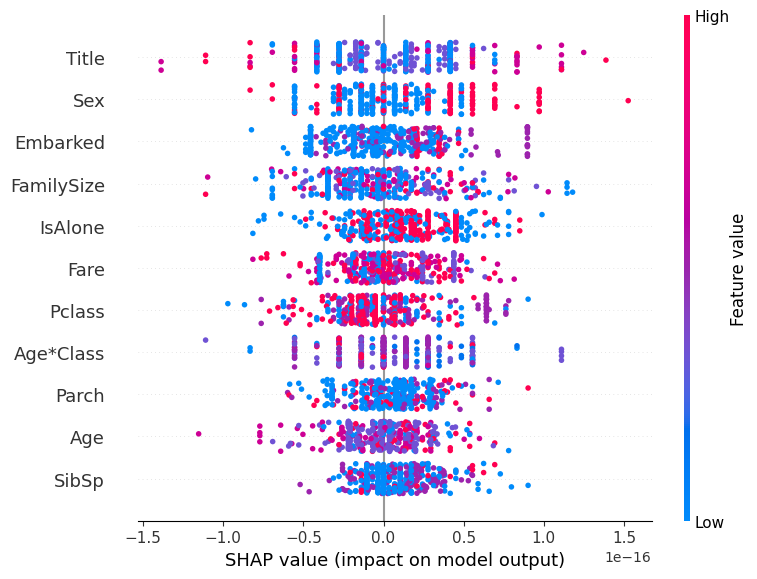

Acc= 78.676


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 418/418 [01:38<00:00,  4.26it/s]

Explainer for KNN..


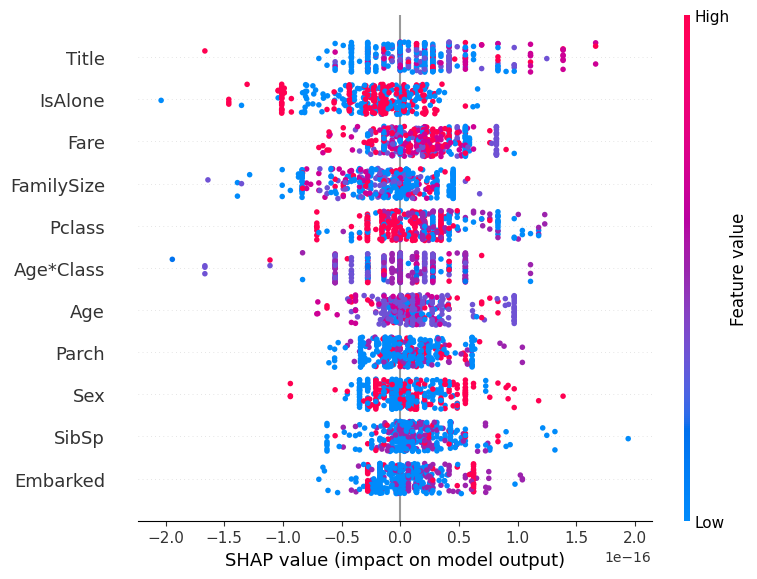

Using 891 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Acc= 72.391


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 418/418 [18:35<00:00,  2.67s/it]


Explainer for Gaussian NB..


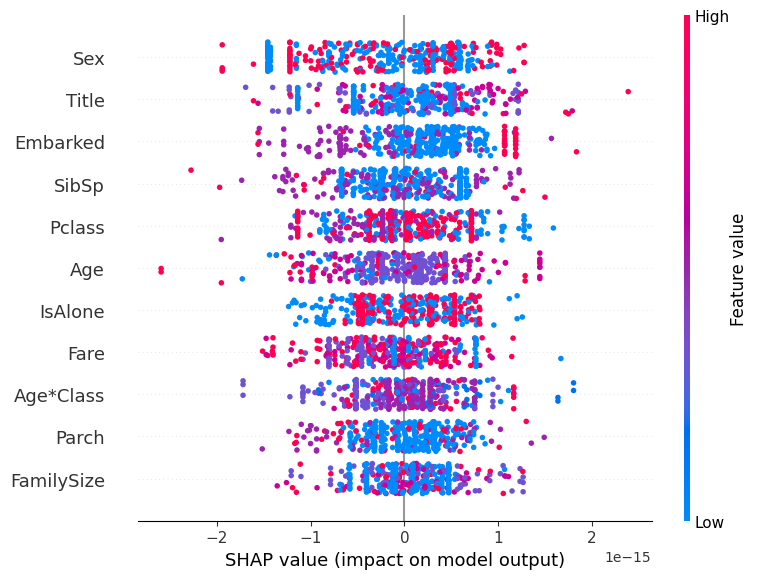

Acc= 89.113
Explainer for Random Forest..


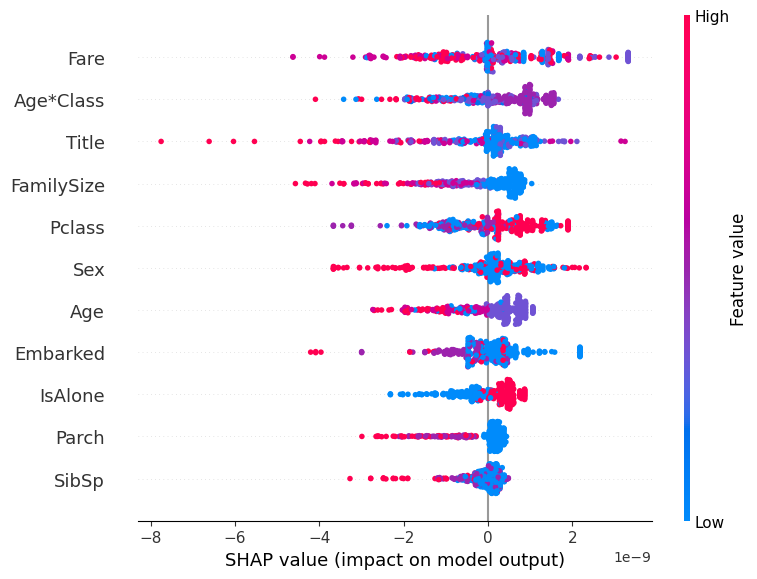

Acc= 88.552
Explainer for XGBoost..


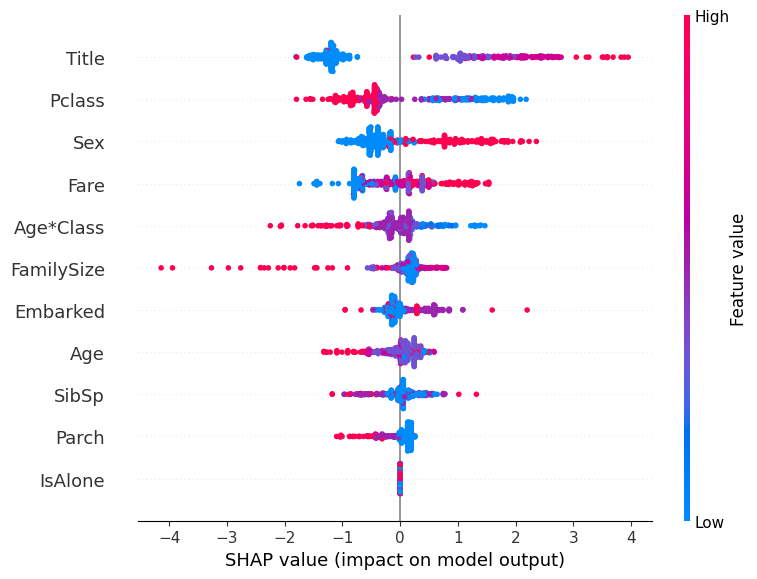

['explainers_titanic.pkl']

In [71]:
# Models definition and training
import shap

import xgboost as xgb

import matplotlib.pyplot as plt

import joblib

import pickle

from sklearn.metrics import roc_curve

# define the Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 3)
print('Acc= ' + str(acc_log))

# calculate shap values here

explainer_log = shap.LinearExplainer(logreg, X_train)
shap_values_log = explainer_log.shap_values(X_test)

print('Explainer for LogReg..')

shap.summary_plot(shap_values_log, X_test)

# Save the model to a file
with open('models_titanic.pkl', 'wb') as file:
    pickle.dump([logreg], file)
    
# Save explainers to file

joblib.dump([explainer_log], filename='explainers_titanic.pkl', compress=('bz2', 9))


# define the Support Vector Machines


svc = SVC(kernel='rbf', probability=True)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 3)
print('Acc= ' + str(acc_svc))

# calculate shap values here
random_indices = np.random.randint(0, len(X_train), size=15)
explainer_svm = shap.KernelExplainer(svc.predict_proba, X_train.iloc[random_indices])
shap_values_svm = explainer_svm.shap_values(X_test)

print('Explainer for SVM..')

shap.summary_plot(np.mean(shap_values_svm,axis=2), X_test)

# Save the model to a file
with open('models_titanic.pkl', 'wb') as file:
    pickle.dump([logreg, svc], file)
    
# Save explainers to file

joblib.dump([explainer_log, explainer_svm], filename='explainers_titanic.pkl', compress=('bz2', 9))


# define the KNeighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 3)
print('Acc= ' + str(acc_knn))

# calculate shap values here

random_indices = np.random.randint(0, len(X_train), size=15)
explainer_knn = shap.KernelExplainer(knn.predict_proba, X_train.iloc[random_indices])
shap_values_knn = explainer_knn.shap_values(X_test)

print('Explainer for KNN..')

shap.summary_plot(np.mean(shap_values_knn,axis=2), X_test)

# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 3)
print('Acc= ' + str(acc_gaussian))


# calculate shap values here

explainer_gaussian = shap.KernelExplainer(gaussian.predict_proba, X_train)
shap_values_gaussian = explainer_gaussian.shap_values(X_test)

print('Explainer for Gaussian NB..')

shap.summary_plot(np.mean(shap_values_gaussian,axis=2), X_test)

# Random Forest


random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 3)
print('Acc= ' + str(acc_random_forest))

random_indices = np.random.randint(0, len(X_train), size=15)

# calculate shap values here

explainer_random = shap.TreeExplainer(random_forest, X_train.iloc[random_indices])
shap_values_random = explainer_random.shap_values(X_test)

print('Explainer for Random Forest..')

shap.summary_plot(np.mean(shap_values_random,axis=2), X_test)

# XGBoost

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)
Y_pred = xgb_model.predict(X_test)
acc_xgb_model = round(xgb_model.score(X_train, Y_train) * 100, 3)
print('Acc= ' + str(acc_xgb_model))

# calculate shap values here

random_indices = np.random.randint(0, len(X_train), size=100)
explainer_xgb = shap.TreeExplainer(xgb_model, X_train.iloc[random_indices])
shap_values_xgb = explainer_xgb.shap_values(X_test)

print('Explainer for XGBoost..')

shap.summary_plot(shap_values_xgb, X_test)

# Save the model to a pkl file

with open('models_titanic.pkl', 'wb') as file:
    pickle.dump([logreg, svc, knn, gaussian, random_forest, xgb_model, acc_log, acc_svc, acc_knn, acc_gaussian, acc_random_forest, acc_xgb_model], file)
    
# Save explainers to a pkl file

joblib.dump([explainer_log, explainer_svm, explainer_knn, explainer_gaussian, explainer_random, explainer_xgb], filename='explainers_titanic.pkl', compress=('bz2', 9))



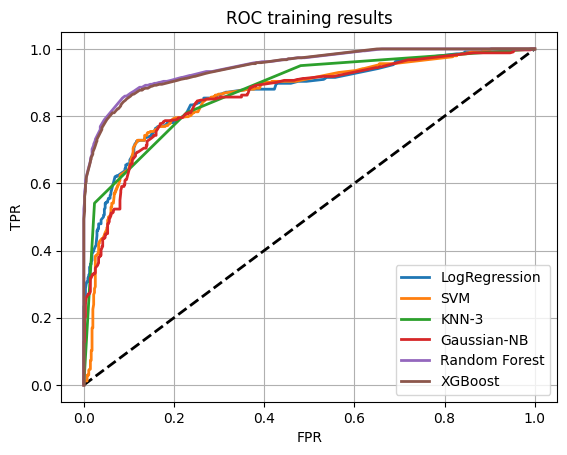

In [69]:
# calculate the training ROC parametlinewidth=2ers
y_pred_logreg = logreg.predict_proba(X_train)[:,1]
fpr1 , tpr1, _ = roc_curve(Y_train, y_pred_logreg)

y_pred_svm = svc.predict_proba(X_train)[:,1]
fpr2 , tpr2, _ = roc_curve(Y_train, y_pred_svm)

y_pred_knn = knn.predict_proba(X_train)[:,1]
fpr3 , tpr3, _ = roc_curve(Y_train, y_pred_knn)

y_pred_gaussian = gaussian.predict_proba(X_train)[:,1]
fpr4 , tpr4, _ = roc_curve(Y_train, y_pred_gaussian)

y_pred_random = random_forest.predict_proba(X_train)[:,1]
fpr5 , tpr5, _ = roc_curve(Y_train, y_pred_random)

y_pred_xgb = xgb_model.predict_proba(X_train)[:,1]
fpr6 , tpr6, _ = roc_curve(Y_train, y_pred_xgb)


# plot the training ROC for each models

plt.plot([0,1],[0,1], 'k--', linewidth=2)
plt.plot(fpr1, tpr1, label= "LogRegression", linewidth=2)
plt.plot(fpr2, tpr2, label= "SVM", linewidth=2)
plt.plot(fpr3, tpr3, label= "KNN-3", linewidth=2)
plt.plot(fpr4, tpr4, label= "Gaussian-NB", linewidth=2)
plt.plot(fpr5, tpr5, label= "Random Forest", linewidth=2)
plt.plot(fpr6, tpr6, label= "XGBoost", linewidth=2)
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC training results')

plt.grid()

plt.savefig('./ROC_training_results.jpg')

plt.show()